In [50]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Read-in the dataset
df = pd.read_csv('drive/MyDrive/GovTech/FullFunctioning/bhutan_landslide_data.csv')

In [53]:
df.head(5)

,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,0,slide,1,1,1,2,1,7,1,5,2,4,1
1,1,slide,1,1,1,3,1,4,2,2,2,5,1
2,2,slide,1,1,1,2,3,7,1,1,1,3,0
3,3,slide,1,1,1,3,1,10,1,2,2,4,0
4,4,slide,1,1,1,3,1,10,1,4,3,5,0


In [54]:
df.drop(['FID'], axis = 1, inplace = True)
df.drop(['Type'], axis = 1, inplace = True)
df

,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,1,1,1,2,1,7,1,5,2,4,1
1,1,1,1,3,1,4,2,2,2,5,1
2,1,1,1,2,3,7,1,1,1,3,0
3,1,1,1,3,1,10,1,2,2,4,0
4,1,1,1,3,1,10,1,4,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...
1216,1,5,4,2,1,7,1,1,2,5,1
1217,1,5,4,2,2,8,1,1,2,1,0
1218,1,5,5,3,2,8,1,5,2,4,0
1219,1,5,4,2,3,7,1,2,1,0,0


Rearrange columns

In [55]:
df.columns

Index(['Code', 'Lithology', 'Altitude', 'Slope', 'Total curvature', 'Aspect',
       'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI'],
      dtype='object')

In [56]:
categorical_variables = ['Lithology', 'Altitude', 'Slope', 'Total curvature',
       'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI','Code']
non_categorical_variables = list(set(df.columns) - set(categorical_variables))

# Re-ordering columns to have non-categorical varaibles first
order = non_categorical_variables + categorical_variables
df = df[order]

In [57]:
df

,Aspect,Lithology,Altitude,Slope,Total curvature,Distance to road,Distance to stream,Slope length,TWI,STI,Code
0,7,1,1,2,1,1,5,2,4,1,1
1,4,1,1,3,1,2,2,2,5,1,1
2,7,1,1,2,3,1,1,1,3,0,1
3,10,1,1,3,1,1,2,2,4,0,1
4,10,1,1,3,1,1,4,3,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1216,7,5,4,2,1,1,1,2,5,1,1
1217,8,5,4,2,2,1,1,2,1,0,1
1218,8,5,5,3,2,1,5,2,4,0,1
1219,7,5,4,2,3,1,2,1,0,0,1


Calculate information gain (IG)

In [62]:
features = df.columns[:-1]

# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Code']].values

Feature scaling


In [63]:
from sklearn.preprocessing import StandardScaler

# Stan
features = df.columns[:-1]

# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Code']].values

X = StandardScaler().fit_transform(X)

In [64]:
X.shape

(1221, 10)

Principal Component Analysis

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [66]:
finalDf = pd.concat([principalDf, df[['Code']]], axis = 1)

In [67]:
finalDf

,principal component 1,principal component 2,Code
0,-2.535249,0.297716,1
1,-2.185740,1.391978,1
2,-2.616433,-1.075553,1
3,-2.525713,1.008049,1
4,-2.382773,1.617997,1
...,...,...,...
1216,-0.354310,1.031204,1
1217,-0.165435,-0.364090,1
1218,0.599059,-0.047806,1
1219,-0.102300,-1.863123,1


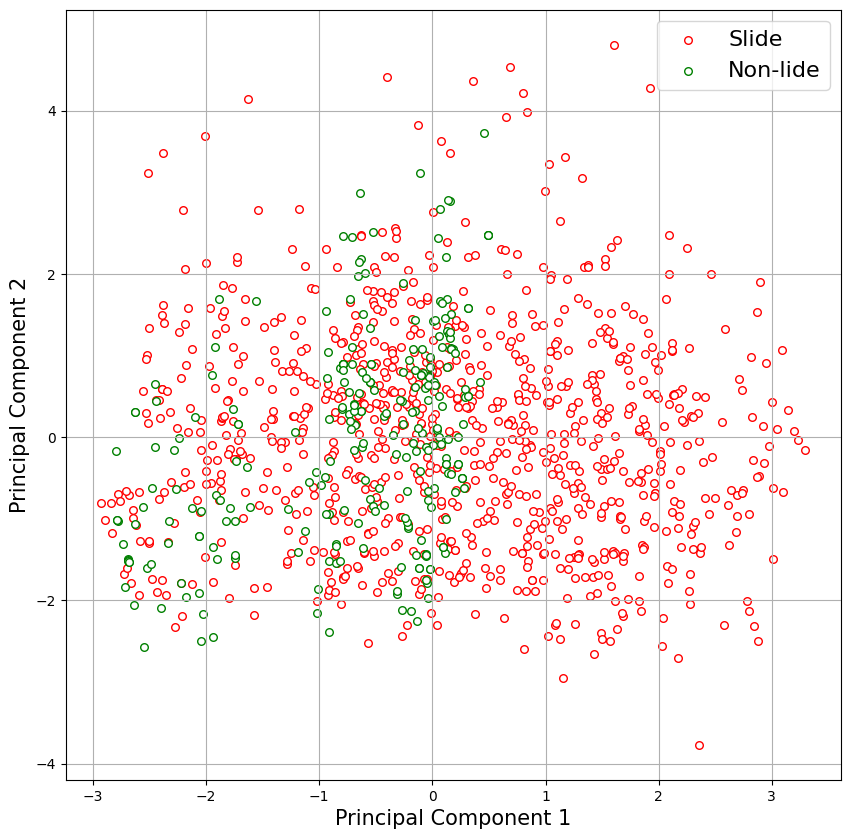

In [68]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = 'white',
#                c = color,
               edgecolors = color,
               s = 30,
#                alpha = 0.25
              )
ax.legend(['Slide','Non-lide'], fontsize =16)
ax.grid()
plt.savefig(os.path.join('drive/MyDrive/GovTech/FullFunctioning/figures','pca.png'), dpi = 300)

Splitting dataset for training and testing

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Machine Learning Algorithms

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

Random Forest

Hyperparameter(s):


*   n_estimators
*   max_features
*   max_depth
*   criterion

Hyperparameter optimization

In [71]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Best score: 0.9159654631083202
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 30}


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train on optimal hyperparameters

In [72]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(X_train, y_train.ravel())


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Get predictions and probabilities on test set



In [73]:
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

Performance metrics

In [74]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba[:,1])

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_proba[:,1])

rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1])

print('Random Forest :')
print('\nConfusion matrix:\n',rf_conf_mat,'\n')
print('Accuracy:',rf_acc)
print('ROC AUC=%.4f' % (rf_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (rf_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (rf_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (rf_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (rf_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (rf_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (rf_cls_f1[1]))

Random Forest :

Confusion matrix:
 [[ 43   8]
 [  9 185]] 

Accuracy: 0.9306122448979591
ROC AUC=0.9701
Precision on (Landslide = 0) = 0.8269 
Recall on (Landslide = 0) = 0.8431 
F1 on (Landslide = 0) = 0.8350
Precision on (Landslide = 1) = 0.9585 
Recall on (Landslide = 1) = 0.9536 
F1 on (Landslide = 1) = 0.9561 


Export trained and tested models

Export performance metrics of models

In [75]:
perf_metr = pd.DataFrame(index = [
                        'Random Forest',
                       ],
             columns = ['Accuracy', 
                        'ROC AUC', 
                        'Precision on Landlside=0', 
                        'Recall on Landlside=0', 
                        'F1-score on Landlside=0', 
                        'Precision on Landlside=1', 
                        'Recall on Landlside=1', 
                        'F1-score on Landlside=1']
            )

In [76]:
rf_perf_metr = pd.Series([rf_acc, rf_roc_auc, rf_cls_precision[0], rf_cls_recall[0], rf_cls_f1[0], rf_cls_precision[0],rf_cls_recall[0], rf_cls_f1[0]])

In [77]:
perf_metr.loc['Random Forest',:] = rf_perf_metr.values

In [78]:
perf_metr = perf_metr.astype(float).round(3)

In [79]:
perf_metr

,Accuracy,ROC AUC,Precision on Landlside=0,Recall on Landlside=0,F1-score on Landlside=0,Precision on Landlside=1,Recall on Landlside=1,F1-score on Landlside=1
Random Forest,0.931,0.97,0.827,0.843,0.835,0.827,0.843,0.835


ROC-AUC curves

<ipython-input-80-1743496f2a7b>:27: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax.legend(handles,labels, fontsize=14)


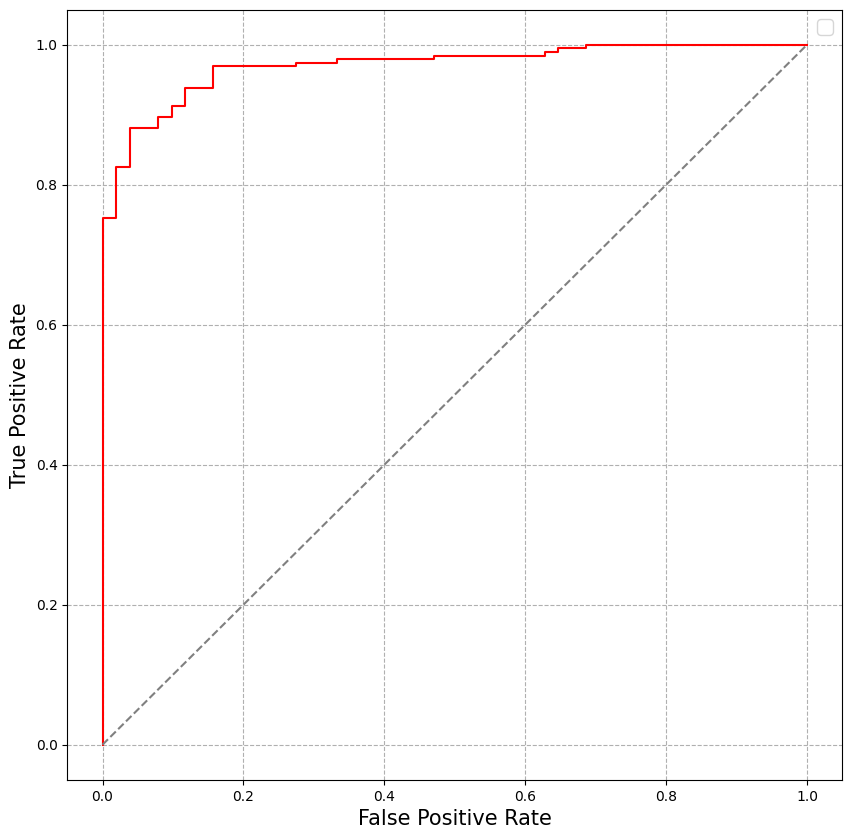

In [80]:
# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])

fig, ax = plt.subplots(1, figsize=(10,10))

# fig.figure(figsize=(10,10))

# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax.plot(rf_fpr, rf_tpr,  color = 'red', label='Random Forest (AUC: ' + str(np.round(rf_roc_auc,4))+')')
ax.plot([0,1],[0,1], color='grey', linestyle='dashed')

# axis labels
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)

# show the legend
# plt.legend()

handles,labels = ax.get_legend_handles_labels()


handles = [handles]
labels = [labels]

ax.grid(linestyle='dashed')
ax.legend(handles,labels, fontsize=14)

plt.show()

In [82]:
import pickle
import os

with open(os.path.join('drive/MyDrive/GovTech/FullFunctioning/streamlit_APP/model/Streamlit_rf.pkl'), 'wb') as file:
    pickle.dump(rf, file)